# Visualizing the Titanic Disaster

### Import the necessary libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

 ### See the first 5 entries

In [3]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###  What is the number of observations in the dataset?

In [4]:
df.shape[0]

891

###  What is the number of columns in the dataset?

In [5]:
df.shape[1]

12

### Print the name of all the columns.

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### What is the name of 105th passenger?

In [7]:
df['Name'][104]

'Gustafsson, Mr. Anders Vilhelm'

### Set PassengerId as the index 

In [8]:
df.set_index('PassengerId',inplace=True)


### Create a pie chart presenting the male/female proportion

([<matplotlib.patches.Wedge at 0x1c91ddec4a0>,
 [Text(-0.4919454315896098, 0.9838646717603559, 'Male'),
  Text(0.49194551760179267, -0.9838646287531149, 'Female')])

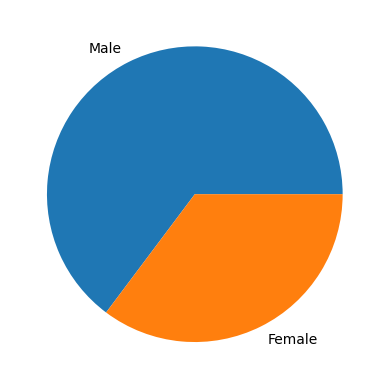

In [9]:
plt.pie(df['Sex'].value_counts(),labels=['Male','Female'])

### Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

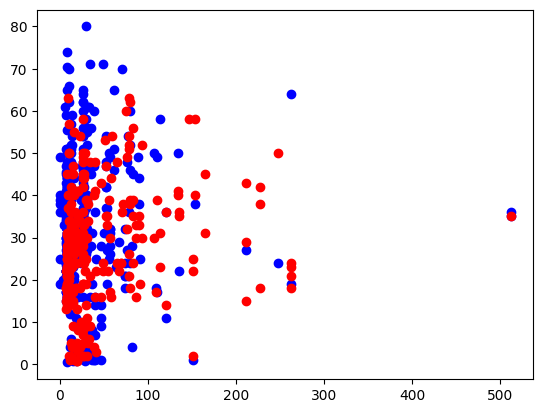

In [10]:
maledf=df[df['Sex']=='male']
femaledf=df[df['Sex']=='female']
plt.scatter(maledf['Fare'],maledf['Age'],c='b')
plt.scatter(femaledf['Fare'],femaledf['Age'],c='r')


### How many people survived?

In [11]:
df[df['Survived']==1].shape[0]


342

### Create a histogram and box plot with the Fare payed (use subplot)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c91deef890>,
 'caps': [<matplotlib.lines.Line2D at 0x1c92009ce90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c92009c770>],
 'medians': [<matplotlib.lines.Line2D at 0x1c92009d370>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c92009d640>],
 'means': []}

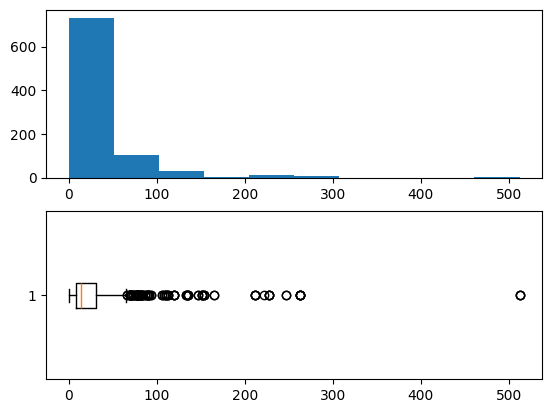

In [12]:
plt.subplot(2,1,1)
plt.hist(df['Fare'])
plt.subplot(2,1,2)
plt.boxplot(df['Fare'],vert=False)

### Drop passengerID and Ticket columns

In [13]:
df.reset_index(inplace=True)
df.drop(['Ticket','PassengerId'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


### Is there a meaningful relationship between living and dying with age? (show relationship by visual representation)

<Axes: xlabel='Age_category', ylabel='count'>

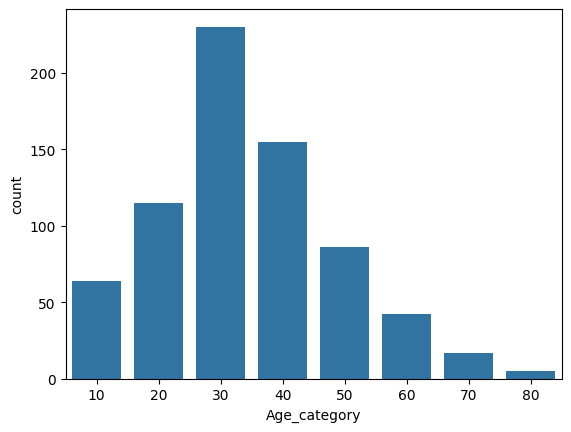

In [17]:
age=pd.cut(df['Age'],bins=8,labels=[10,20,30,40,50,60,70,80])
df['Age_category']=age
sns.countplot(x='Age_category',data=df)

In [51]:
cross_tabb = pd.crosstab(df['Age_category'], df['Survived'])
cross_tab_percentage = cross_tabb.div(cross_tabb.sum(axis=1), axis=0) * 100
cross_tab_percentage


Survived,0,1
Age_category,,
10,40.625000,59.375000
20,61.739130,38.260870
30,63.478261,36.521739
40,55.483871,44.516129
50,61.627907,38.372093
60,59.523810,40.476190
70,76.470588,23.529412
80,80.000000,20.000000


Text(0, 0.5, 'survived percentage')

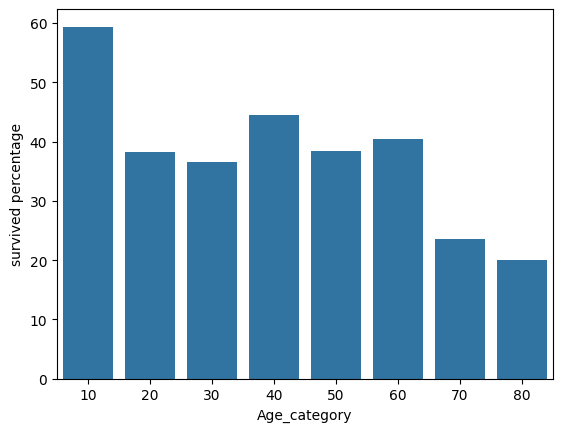

In [56]:
sns.barplot(x='Age_category', y=1, data=cross_tab_percentage)
plt.ylabel('survived percentage')

سنین پاینن(زیر ده سال)شانس زنده موندن بیشتری داشتند و افراد مسن کمتر شانس خیلی کمی داشتند

### Tell me about the relationship between the age, Pclass and sex

<Axes: xlabel='Age', ylabel='Pclass'>

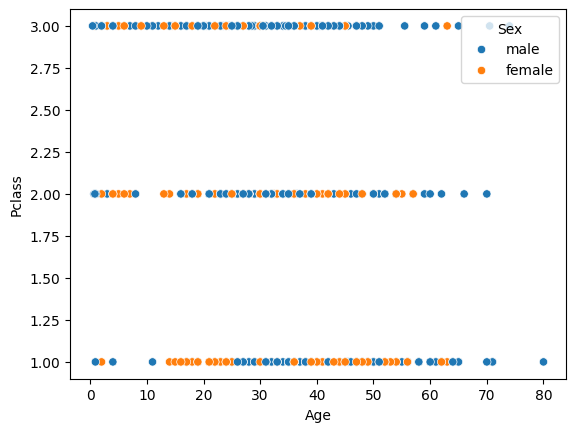

In [100]:
sns.scatterplot(x='Age', y='Pclass', hue='Sex', data=df)

<Axes: >

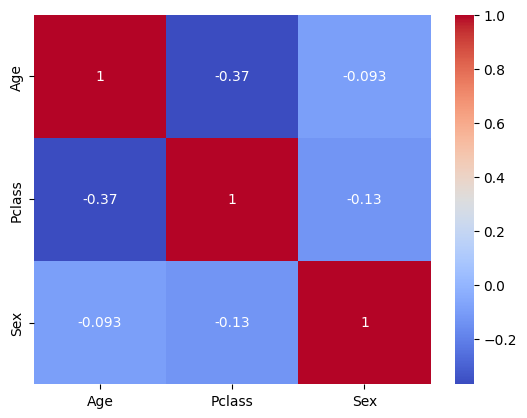

In [142]:
# Correlation matrix
df['Sex'] =np.where(df['Sex']=='male',0,1)
corr = df[['Age', 'Pclass', 'Sex']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: xlabel='Pclass', ylabel='count'>

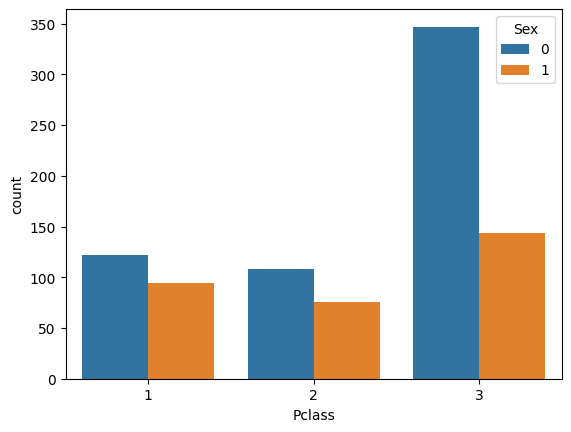

In [133]:
#comparing Pclass /s
sns.countplot(x='Pclass', hue='Sex', data=df)

In [146]:
#comparing Pclass /sex
cross_tab = pd.crosstab(df['Pclass'], df['Sex'])

# محاسبه‌ی نسبت هر کلاس به کل هر جنسیت
male_total = cross_tab[0].sum()  # تعداد کل مردها
female_total = cross_tab[1].sum()  # تعداد کل خانم‌ها
cross_tab['Male_Percentage'] = (cross_tab[0] / male_total) * 100
cross_tab['Female_Percentage'] = (cross_tab[1] / female_total) * 100
cross_tab

Sex,0,1,Male_Percentage,Female_Percentage
Pclass,,,,
1,122,94,21.143847,29.936306
2,108,76,18.717504,24.203822
3,347,144,60.138648,45.859873


(array([23., 11., 41., 47., 44., 35., 24., 19.,  9.,  8.]),
 array([ 0.75 ,  6.975, 13.2  , 19.425, 25.65 , 31.875, 38.1  , 44.325,
        50.55 , 56.775, 63.   ]),
 <BarContainer object of 10 artists>)

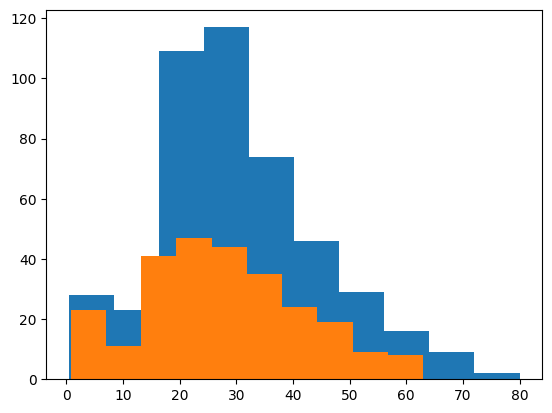

In [159]:
#comparing age /sex
plt.hist(df[df['Sex']==0].Age)
plt.hist(df[df['Sex']==1].Age)

result:
direct relationship between age and pclass(old passengers have upper class)
most of passengers are men
Totaly lower class tickets purchased(mostly by men)
But a higher percentage of women bought high-class tickets than men